<a href="https://colab.research.google.com/github/Poojasharma1301/Poojasharma1301.github.io/blob/master/Sample_hackthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [4]:
train = pd.read_csv("train.csv")

In [5]:
train.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   int64  
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6328 non-null   float64
 15  CustomerAttrition    6338 non-null   o

In [8]:
train.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,6338.000000,6338.000000,6328.000000
mean,31.946040,64.814490,2290.544207
std,24.559659,30.191091,2265.181098
min,-2.000000,16.504109,16.297961
25%,8.000000,35.645524,401.849530
50%,29.000000,70.534085,1407.589119
75%,55.000000,90.058498,3823.855846
max,73.000000,120.159190,8685.848657


In [9]:
#Now we will check if our dataset contains null or missings values
train.isnull().sum()

ID                      0
sex                     0
Aged                    0
Married                 0
TotalDependents         0
ServiceSpan             0
MobileService           0
4GService               0
CyberProtection         0
HardwareSupport         0
TechnicalAssistance     0
FilmSubscription        0
SettlementProcess       0
QuarterlyPayment        0
GrandPayment           10
CustomerAttrition       0
dtype: int64

In [10]:
#we can also use .corr to determine the correlation between the variables
train.corr()

,ServiceSpan,QuarterlyPayment,GrandPayment
ServiceSpan,1.000000,0.249470,0.824522
QuarterlyPayment,0.249470,1.000000,0.652655
GrandPayment,0.824522,0.652655,1.000000


In [11]:
train.dtypes

ID                      object
sex                     object
Aged                    object
Married                 object
TotalDependents         object
ServiceSpan              int64
MobileService           object
4GService               object
CyberProtection         object
HardwareSupport         object
TechnicalAssistance     object
FilmSubscription        object
SettlementProcess       object
QuarterlyPayment       float64
GrandPayment           float64
CustomerAttrition       object
dtype: object

In [13]:
def print_unique_col_values(train):
       for column in train:
            if train[column].dtypes=='object':
                print(f'{column}: {train[column].unique()}')

In [14]:
print_unique_col_values(train)

ID: ['B60LHTZLLPFU4IULNPUF' '1RUJ7ONYZHYTWKOKO1SD' 'DZ9EEOQWSN0MYCBUPAM5' ...
 'ZBBW7H8AYLZJ2HK5TBBJ' 'BUE75NSSLT2S2URTKZRN' 'IRFAYIAO820RIX2GUFFF']
sex: ['Female' 'Male']
Aged: ['No' 'Yes']
Married: ['No' 'Yes']
TotalDependents: ['Yes' 'No']
MobileService: ['Yes' 'No']
4GService: ['Wifi Broadband' 'Satellite Broadband' 'No']
CyberProtection: ['No' 'Yes']
HardwareSupport: ['Yes' 'No']
TechnicalAssistance: ['Yes' 'No']
FilmSubscription: ['No' 'Yes']
SettlementProcess: ['Check' 'Bank' 'Card' 'Electronic']
CustomerAttrition: ['Yes' 'No']


In [15]:
yes_no_columns = ['Aged','Married','TotalDependents','MobileService','CyberProtection','HardwareSupport','TechnicalAssistance',
                'FilmSubscription','CustomerAttrition' ]
for col in yes_no_columns:
    train[col].replace({'Yes': 1,'No': 0},inplace=True)

In [16]:
train['sex'].replace({'Female':1,'Male':0},inplace=True)
train.sex.unique()

array([1, 0])

In [17]:
train.dtypes

ID                      object
sex                      int64
Aged                     int64
Married                  int64
TotalDependents          int64
ServiceSpan              int64
MobileService            int64
4GService               object
CyberProtection          int64
HardwareSupport          int64
TechnicalAssistance      int64
FilmSubscription         int64
SettlementProcess       object
QuarterlyPayment       float64
GrandPayment           float64
CustomerAttrition        int64
dtype: object

In [18]:
train1 = pd.get_dummies(data=train, columns=['4GService','SettlementProcess'])
train1.columns

Index(['ID', 'sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'QuarterlyPayment',
       'GrandPayment', 'CustomerAttrition', '4GService_No',
       '4GService_Satellite Broadband', '4GService_Wifi Broadband',
       'SettlementProcess_Bank', 'SettlementProcess_Card',
       'SettlementProcess_Check', 'SettlementProcess_Electronic'],
      dtype='object')

In [19]:
train1.dtypes

ID                                object
sex                                int64
Aged                               int64
Married                            int64
TotalDependents                    int64
ServiceSpan                        int64
MobileService                      int64
CyberProtection                    int64
HardwareSupport                    int64
TechnicalAssistance                int64
FilmSubscription                   int64
QuarterlyPayment                 float64
GrandPayment                     float64
CustomerAttrition                  int64
4GService_No                       uint8
4GService_Satellite Broadband      uint8
4GService_Wifi Broadband           uint8
SettlementProcess_Bank             uint8
SettlementProcess_Card             uint8
SettlementProcess_Check            uint8
SettlementProcess_Electronic       uint8
dtype: object

In [20]:
mean_value=train1['GrandPayment'].mean()
train1['GrandPayment'].fillna(value=mean_value,inplace=True)

In [21]:
train1.isnull().sum()

ID                               0
sex                              0
Aged                             0
Married                          0
TotalDependents                  0
ServiceSpan                      0
MobileService                    0
CyberProtection                  0
HardwareSupport                  0
TechnicalAssistance              0
FilmSubscription                 0
QuarterlyPayment                 0
GrandPayment                     0
CustomerAttrition                0
4GService_No                     0
4GService_Satellite Broadband    0
4GService_Wifi Broadband         0
SettlementProcess_Bank           0
SettlementProcess_Card           0
SettlementProcess_Check          0
SettlementProcess_Electronic     0
dtype: int64

In [22]:
train1.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,CustomerAttrition,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,B60LHTZLLPFU4IULNPUF,1,0,0,1,48,1,0,1,1,0,96.259802,4628.129119,1,0,0,1,0,0,1,0
1,1RUJ7ONYZHYTWKOKO1SD,0,0,1,0,45,1,0,0,0,1,18.876470,922.085998,0,0,0,1,1,0,0,0
2,DZ9EEOQWSN0MYCBUPAM5,0,1,1,0,59,1,1,0,1,0,106.016057,6205.891129,1,0,0,1,0,1,0,0
3,YZ43L1UQUQACTL1PXXZG,0,0,0,0,14,1,0,0,0,0,80.108839,1248.655391,0,0,0,1,0,0,1,0
4,6P28152QGF60PDLSCB9M,1,0,1,1,25,1,0,1,0,1,51.529773,1285.321277,0,0,0,1,0,0,1,0


In [46]:
cols_to_scale = ['QuarterlyPayment', 'ServiceSpan', 'GrandPayment']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train1[cols_to_scale] = scaler.fit_transform(train1[cols_to_scale])


In [47]:
for col in train1:
    print(f'{col}: {train1[col].unique()}')

sex: [1 0]
Aged: [0 1]
Married: [0 1]
TotalDependents: [1 0]
ServiceSpan: [0.66666667 0.62666667 0.81333333 0.21333333 0.36       0.38666667
 0.73333333 0.02666667 0.04       0.64       0.92       0.34666667
 0.84       0.74666667 0.14666667 0.42666667 0.26666667 0.09333333
 0.88       0.06666667 0.57333333 0.56       0.44       0.30666667
 0.22666667 0.10666667 0.94666667 0.98666667 0.46666667 0.97333333
 0.05333333 0.50666667 0.13333333 0.52       0.48       0.4
 0.01333333 0.82666667 0.32       0.93333333 0.17333333 0.54666667
 0.8        0.16       0.69333333 0.08       0.61333333 0.68
 0.53333333 0.76       0.70666667 0.24       0.89333333 0.2
 0.37333333 0.28       0.78666667 0.96       1.         0.58666667
 0.49333333 0.85333333 0.33333333 0.77333333 0.65333333 0.86666667
 0.45333333 0.41333333 0.12       0.29333333 0.6        0.18666667
 0.72       0.25333333 0.90666667 0.        ]
MobileService: [1 0]
CyberProtection: [0 1]
HardwareSupport: [1 0]
TechnicalAssistance: [1 0]
Fi

In [26]:
#check for any missing or null values in the train data
train1.isnull().values.any()

False

In [27]:
#data.drop('ID',axis='columns' , inplace=True)
train1.drop('ID' ,axis='columns', inplace=True)

In [49]:
train1.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,CustomerAttrition,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,1,0,0,1,0.666667,1,0,1,1,0,0.769434,0.531957,1,0,0,1,0,0,1,0
1,0,0,1,0,0.626667,1,0,0,0,1,0.022887,0.104479,0,0,0,1,1,0,0,0
2,0,1,1,0,0.813333,1,1,0,1,0,0.863556,0.713946,1,0,0,1,0,1,0,0
3,0,0,0,0,0.213333,1,0,0,0,0,0.613619,0.142148,0,0,0,1,0,0,1,0
4,1,0,1,1,0.360000,1,0,1,0,1,0.337906,0.146377,0,0,0,1,0,0,1,0


In [29]:
#Split the data into independent 'X' and dependent 'Y' variables
#X = train1.iloc[:, 1:train1.shape[1]].values 
#Y = train1.iloc[:, 0].values

In [48]:
X = train1.drop('CustomerAttrition',axis='columns')
Y = train1['CustomerAttrition']

# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [50]:
X_train.shape

(4753, 19)

In [51]:
Y_train.shape

(4753,)

In [52]:
X_test.shape

(1585, 19)

In [34]:
Y_test.shape

(1585,)

In [53]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
149/149 [==============================] - 1s 1ms/step - loss: 0.6754 - accuracy: 0.5527
Epoch 2/100
149/149 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.7409
Epoch 3/100
149/149 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.7579
Epoch 4/100
149/149 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.7869
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7873
Epoch 6/100
149/149 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.7816
Epoch 7/100
149/149 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7917
Epoch 8/100
149/149 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.7934
Epoch 9/100
149/149 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.7936
Epoch 10/100
149/149 [==============================] - 0s 1ms/step - loss: 0.4387 - accura

In [54]:
model.evaluate(X_test, Y_test)

50/50 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.7912


[0.4594690501689911, 0.7911671996116638]

In [55]:
yp = model.predict(X_test)
yp[:5]

array([[0.20840806],
       [0.5022308 ],
       [0.4149006 ],
       [0.21993455],
       [0.86266804]], dtype=float32)

In [56]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [57]:
y_pred[:10]

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

In [58]:
Y_test[:10]

6135    0
733     1
3352    0
3312    0
6076    0
5135    0
1824    0
2817    0
3420    0
3540    1
Name: CustomerAttrition, dtype: int64

In [59]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1162
           1       0.64      0.51      0.57       423

    accuracy                           0.79      1585
   macro avg       0.73      0.70      0.71      1585
weighted avg       0.78      0.79      0.78      1585



Text(69.0, 0.5, 'Truth')

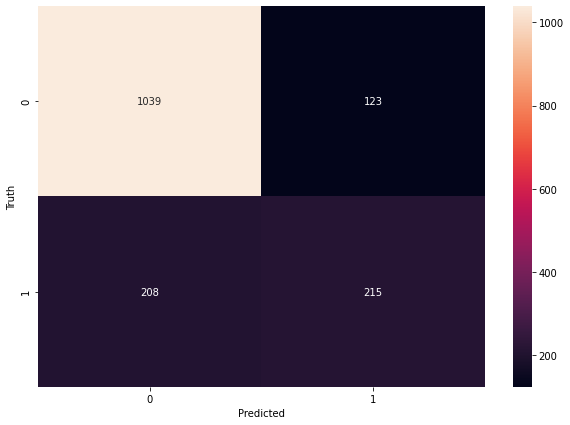

In [60]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
round((1039+215)/(1039+123+208+215),2)

0.79